In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving bestsellers with categories.csv to bestsellers with categories.csv
User uploaded file "bestsellers with categories.csv" with length 51161 bytes


In [ ]:
df = pd.read_csv('bestsellers with categories.csv')
df.head(6)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


El conjunto de datos es una tabla que contiene el top 50 de los libros más vendidos por Amazon por año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o No ficción.

Las variables que contiene son:

Name: Nombre del libro.

Author: Autor.

User Rating: Calificación promedio que los usuarios asignaron al libro (1-5).

Reviews: Número de reseñas.

Price: Precio del libro.

Year: Año de publicación.

Genre: Género literario (ficción/no ficción).


# Análisis estadístico

Carga la tabla de datos y haz un análisis estadístico de las variables.

Verifica la cantidad de datos que tienes, las variables que contiene cada vector de datos e identifica el tipo de variables.

Analiza las variables para saber que representa cada una y en que rangos se encuentran. Si la descripción del problema no te lo indica, utiliza el máximo y el mínimo para encontrarlo.

Basándote en la media, mediana y desviación estándar de cada variable, ¿qué conclusiones puedes entregar de los datos?

Calcula la correlación de las variables que consideres relevantes.

In [ ]:
# 1.-
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [ ]:
# 2.-
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [ ]:
# 2.- Con rangos min-max
df.groupby(['User Rating', 'Reviews']).agg(['min', 'max'])[['Price', 'Year']]

Price      Year      
                      min max   min   max
User Rating Reviews                      
3.3         9372       12  12  2012  2012
3.6         14982      19  19  2015  2015
3.8         47265      14  14  2012  2013
3.9         6310       13  13  2013  2013
            33844      20  20  2013  2014
...                   ...  ..   ...   ...
4.9         14344       5   5  2017  2019
            19546       5   5  2013  2019
            19576       8   8  2011  2016
            19622      30  30  2016  2016
            21834       8   8  2012  2019

[349 rows x 4 columns]

In [ ]:
# 3.-
  # Media:
print('Media del precio: ', df['Price'].mean())
print('Media de Reviews: ', df['Reviews'].mean())
print('Media de User Ratings: ', df['User Rating'].mean())
  # Mediana:
print('Mediana del precio:', df['Price'].median())
print('Mediana de Reviews:', df['Reviews'].median())
print('Median de User Ratings:', df['User Rating'].median())
  # Desviación estandar (varianza):
print('Varianza del precio: ', df['Price'].var())
print('Varianza de Reviews: ', df['Reviews'].var())
print('Varianza de User Ratings: ', df['User Rating'].var())
  # Desviación estandar (desviación):
print('Desviación estándar de precio: ', df['Price'].std())
print('Desviación estándar de Reviews: ', df['Reviews'].std())
print('Desviación estándar de User Ratings: ', df['User Rating'].std())

Media del precio:  13.1
Media de Reviews:  11953.281818181818
Media de User Ratings:  4.618363636363637
Mediana del precio: 11.0
Mediana de Reviews: 8580.0
Median de User Ratings: 4.7
Varianza del precio:  117.55464480874316
Varianza de Reviews:  137619458.41041565
Varianza de User Ratings:  0.05152008610697136
Desviación estándar de precio:  10.84226197842236
Desviación estándar de Reviews:  11731.132017431892
Desviación estándar de User Ratings:  0.2269803650251963


In [ ]:
# 4.-
df.corr()

<ipython-input-9-7f0e09cd6ae5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


In [ ]:
#4.-
selected = df[['User Rating', 'Reviews', 'Price']]
selected.head(5)
print('Correlación Pearson: ', selected['User Rating'].corr(selected['Price'], method='pearson'))
print('Correlación spearman: ', selected['User Rating'].corr(selected['Price'], method='spearman'))
print('Correlación kendall: ', selected['User Rating'].corr(selected['Price'], method='kendall'))
print('Correlación Pearson: ', selected['Reviews'].corr(selected['Price'], method='pearson'))
print('Correlación spearman: ', selected['Reviews'].corr(selected['Price'], method='spearman'))
print('Correlación kendall: ', selected['Reviews'].corr(selected['Price'], method='kendall'))

Correlación Pearson:  -0.13308628728087976
Correlación spearman:  -0.23106979558156984
Correlación kendall:  -0.169169022203182
Correlación Pearson:  -0.10918188342780516
Correlación spearman:  -0.15026314273004007
Correlación kendall:  -0.09471660449212715


In [ ]:
from scipy import stats
from scipy.stats import pearsonr


r, p = stats.pearsonr(selected['User Rating'], selected['Price'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(selected['User Rating'], selected['Price'])
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(selected['User Rating'], selected['Price'])
print(f"Correlación Pearson: r={r}, p-value={p}")


r, p = stats.pearsonr(selected['Reviews'], selected['Price'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(selected['Reviews'], selected['Price'])
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(selected['Reviews'], selected['Price'])
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=-0.13308628728087996, p-value=0.0017601566810129937
Correlación Spearman: r=-0.23106979558156984, p-value=4.227234521279631e-08
Correlación Pearson: r=-0.169169022203182, p-value=6.399075460830661e-08
Correlación Pearson: r=-0.10918188342780519, p-value=0.010395725279703128
Correlación Spearman: r=-0.15026314273004007, p-value=0.0004061394606754487
Correlación Pearson: r=-0.09471660449212715, p-value=0.001193120058169779


Conclusiones:

¿Cuáles son las variables relevantes e irrelevantes para el análisis?

Una irrelevante es "Year" y es por eso que durante todos los análisis se le hizo un "drop" para no tomarla en cuenta.

Viendo los valores de r, se puede concluir que la relación lineal existente es débil ya que el valor de "r" se aproxima bastante a 0

# Análisis gráfico

Realiza el análisis de las variables usando diagramas de cajas y bigotes, histogramas y mapas de calor.

Responde las siguientes preguntas:

¿Hay alguna variable que no aporta información? Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?
¿Existen variables que tengan datos extraños?
Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?
¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?
Haz un análisis estadístico de los datos antes de empezar con la segmentación. Debe contener al menos:

1 gráfico de caja (boxplot)

1 mapa de calor

1 gráfico de dispersión

Describe brevemente las conclusiones que se pueden obtener con las gráficas.

Text(0.5, 1.0, 'Histograma de evaluación del libro por género')

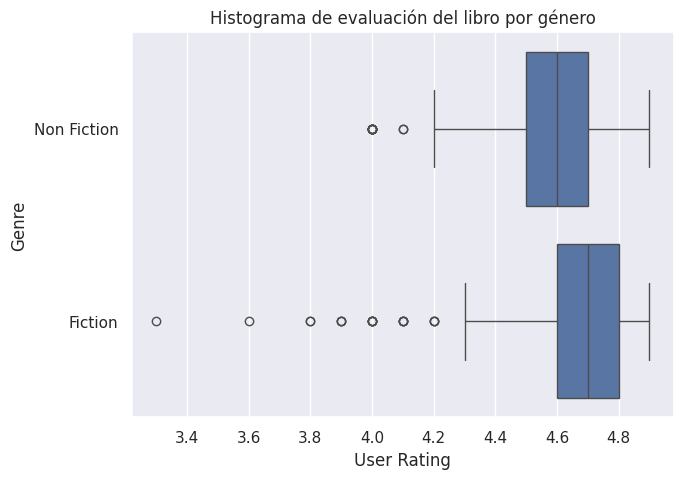

In [ ]:
# 1.- Comparación rangos género y user rating
fig = plt.figure(figsize=(7,5))

# Gráfico boxplot
sns.boxplot(data=df, x='User Rating', y = 'Genre')

# Ejes y título
plt.title('Histograma de evaluación del libro por género')

Después de hacer las gráficas con todas las variables, la mayoría era ilegible por la diferencia de los valores de los datos. Pero esta es la que mejor se puede visualizar.

<ipython-input-13-75c6f5afb9af>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), vmin=-1, vmax=1, cmap = 'RdBu', annot=True, square = True)


<Axes: >

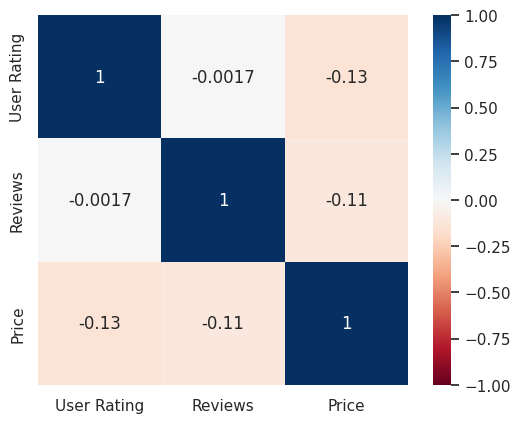

In [ ]:
# 2.- Mapa de calor
df=df.drop('Year',axis=1)
sns.heatmap(data=df.corr(), vmin=-1, vmax=1, cmap = 'RdBu', annot=True, square = True)

Con esta gráfica podemos identificar grupos similares, los grupos que más se parecen son Price & Reviews con un valor de -0.11.

A su vez, hay un "drop" para la variable de "year", ya que la consideramos cualitativa y la eliminamos del análisis ya que no es relevante.

Text(0, 0.5, 'Price')

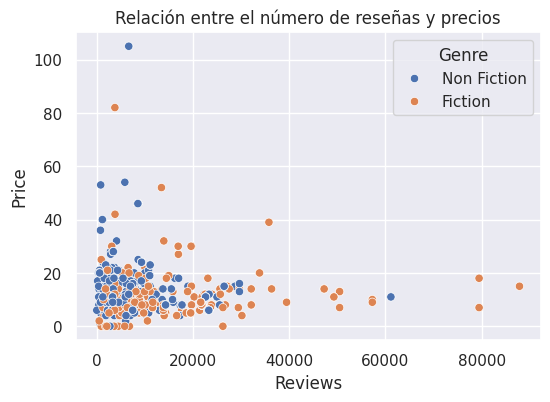

In [ ]:
# 3.- Gráfico de dispersión
# Tamaño de la imagen.
fig = plt.figure(figsize=(6, 4))

# Gráfico scatterplot.
sns.scatterplot(data=df, x ='Reviews', y='Price' ,hue='Genre')

# Ejes y título. Colocamos la etiqueta correcta de acuerdo a la orientación.
plt.title('Relación entre el número de reseñas y precios')
plt.xlabel('Reviews')
plt.ylabel('Price')

# Clústering

Una vez que hayas realizado un análisis preliminar, haz una segmentación utilizando el método de K-Means. Justifica el número de clusters que elegiste.

Determina un valor de
Calcula los centros de los grupos resultantes del algoritmo k-means
Basado en los centros responde las siguientes preguntas

¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?

¿Cómo obtuviste el valor de usar?

¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?

¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?

¿Qué puedes decir de los datos basándose en los centros?

In [ ]:
from sklearn.preprocessing import StandardScaler

# Variables a normalizar
numeric_cols = ['User Rating',	'Reviews', 'Price']
X = df.loc[:, numeric_cols]

# Escalamiento.
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# El escalador nos genera una matriz de numpy. Vamos a convertirlo en DF
X_norm = pd.DataFrame(X_norm, columns=numeric_cols)
X_norm.head()

,User Rating,Reviews,Price
0,0.359990,0.460453,-0.470810
1,-0.080978,-0.844786,0.821609
2,0.359990,0.599440,0.175400
3,0.359990,0.808050,-0.655441
4,0.800958,-0.365880,-0.101547


*No se puede poner la variable "genre" porque genera error

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Silhouette Score')

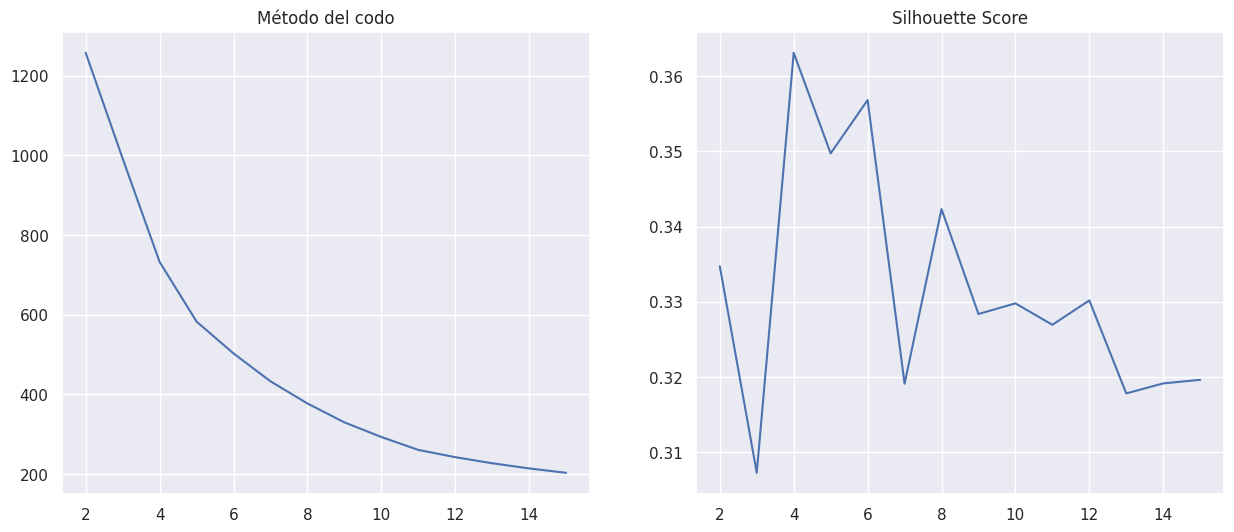

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Declaramos algunos arreglos. Guardar los valores de la WCSS
 # y la silhouette score
kmax   = 16
grupos = range(2, kmax)
wcss   = []
sil_score = []

# Ciclo para calcular K-Means para diferentes k
for k in grupos:
    # Clustering
    model = KMeans(n_clusters=k, random_state = 47)

    # Obtener las etiquetas
    clusters = model.fit_predict(X_norm)

    # Guardar WCSS
    wcss.append(model.inertia_)

    # Guardar Silhouette Score
    sil_score.append(silhouette_score(X_norm, clusters))

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Primera figura es el codo
axs[0].plot(grupos, wcss)
axs[0].set_title('Método del codo')

# La segunda es el Silhouette Score
axs[1].plot(grupos, sil_score)
axs[1].set_title('Silhouette Score')

In [ ]:

# Generamos los 6 grupos
model = KMeans(n_clusters=6, random_state=47)
clusters = model.fit_predict(X_norm)

# Agregamos los clusters a nuestros DATOS ORIGINALES
df['Grupo'] = clusters.astype('str')
df.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Name,Author,User Rating,Reviews,Price,Year,Genre,Grupo
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,0
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,4
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,0
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,4


Fueron 6 grupos, ya que después de probar, era como la información se podía visualizar de una mejor manera

Text(0.5, 1.05, '6 grupos')

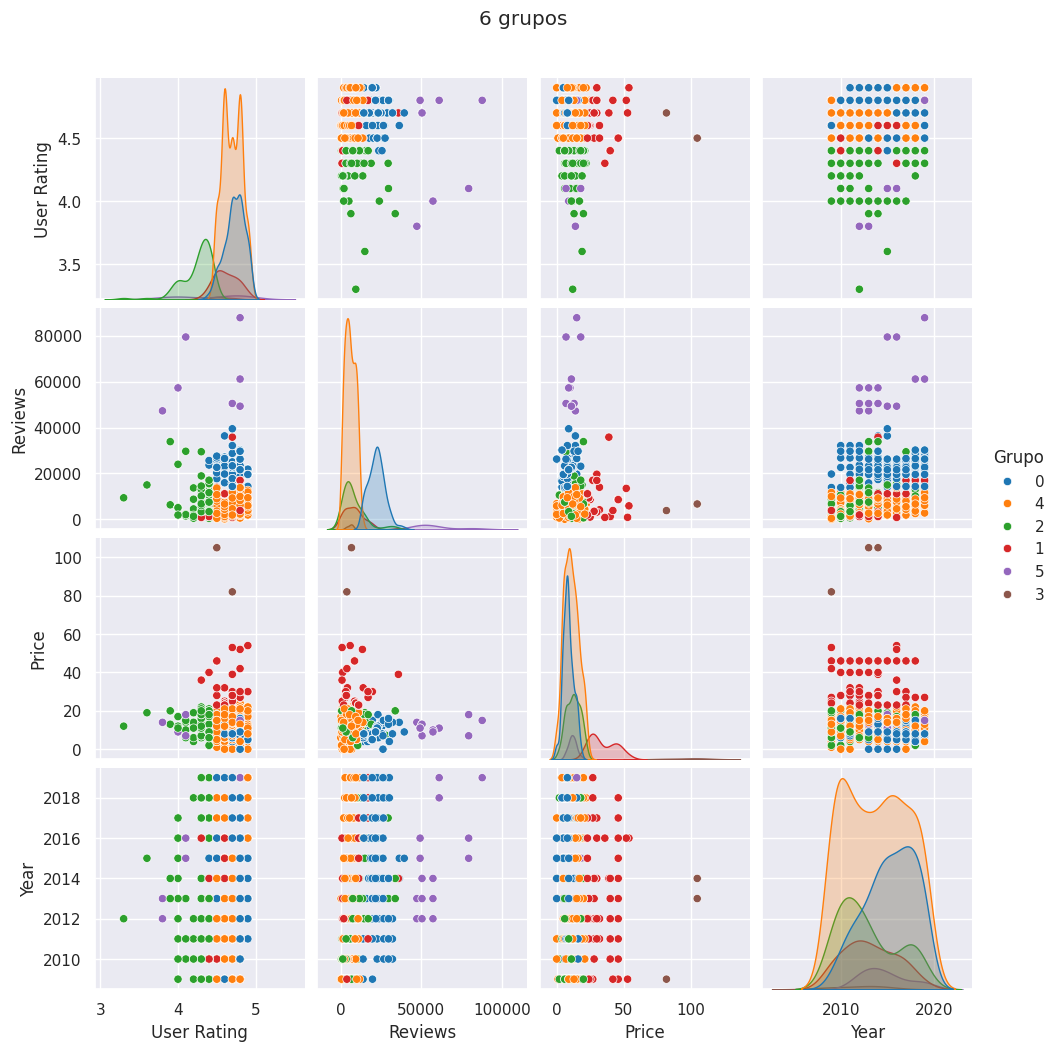

In [ ]:
sns.pairplot(data=df, hue='Grupo', palette='tab10')
plt.suptitle('6 grupos', y=1.05)

In [ ]:
# Graficar las 3 variables al mismo tiempo.
import plotly.express as px

fig = px.scatter_3d(df, x = 'User Rating', y = 'Reviews',
                    z = 'Price',
                    title='6 grupos',
                    color='Grupo',
                    color_discrete_sequence=px.colors.qualitative.D3)

fig.show()

In [ ]:
# Características de cada grupo (los centros)
df.groupby('Grupo').mean()

<ipython-input-19-6cdb992aee0a>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,User Rating,Reviews,Price,Year
Grupo,,,,
0,4.727407,22135.555556,8.622222,2015.296296
1,4.616327,8457.918367,34.428571,2013.163265
2,4.243373,7951.469880,12.313253,2012.915663
3,4.566667,5719.666667,97.333333,2012.000000
4,4.693939,5903.750000,10.806818,2013.814394
5,4.412500,58490.375000,11.687500,2014.687500


In [ ]:
# Dispersiones
df.groupby('Grupo').std()


<ipython-input-20-985604820ca9>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,User Rating,Reviews,Price,Year
Grupo,,,,
0,0.124247,5124.291640,3.830098,2.685156
1,0.150481,6752.024011,9.635006,2.786477
2,0.198895,7223.612837,5.072469,3.132072
3,0.115470,1661.614075,13.279056,2.645751
4,0.120996,3246.461618,5.436515,3.304511
5,0.411299,12743.848100,2.891799,2.358495
